In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
reads = []
width = 300
for n in range(100):
    nstart = np.random.randint(0, 1000)
    nend = nstart + np.random.randint(width) - width / 2
    if nstart != nend:
        reads.append([nstart, nend])
        
max = np.max(reads)
min = np.min(reads)

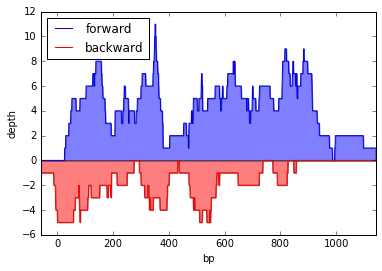

In [2]:
dx = 1
xs = np.arange(min, max, dx)
ys_forward = np.zeros(len(xs),dtype=np.int)
ys_backward = np.zeros(len(xs),dtype=np.int)
for i, x in enumerate(xs):
    cnt_forward = 0
    cnt_backward = 0
    for ary in reads:
        if ary[0] < ary[1]:
            if ary[0] < x and x < ary[1]:
                cnt_forward += 1
        elif ary[1] < ary[0]:
            if ary[1] < x and x < ary[0]:
                cnt_backward -= 1
    ys_forward[i] = cnt_forward
    ys_backward[i] = cnt_backward
plt.xlabel("bp")
plt.ylabel("depth")
plt.xlim([min,max])
plt.plot(xs, ys_forward, 'b-', label="forward")
plt.fill_between( xs, ys_forward, facecolor='blue', alpha=0.5 )
plt.xlabel("bp")
plt.ylabel("depth")
plt.xlim([min,max])
plt.plot(xs, ys_backward, 'r-', label="backward")
plt.fill_between( xs, ys_backward, facecolor='red', alpha=0.5 )
plt.legend(loc='best') 
plt.show()

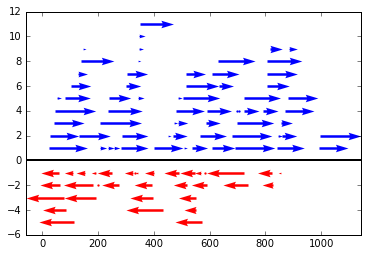

In [3]:
level_forward = 0
level_backward = 0
last_forward = {}
last_backward = {}
max_level = 0
min_level = 0
for ary in sorted(reads):
    if ary[0] < ary[1]:
        level_forward = 1
        if not last_forward.has_key(level_forward):
            last_forward[level_forward] = min
        while ary[0] < last_forward[level_forward]:
            level_forward += 1
            if not last_forward.has_key(level_forward):
                last_forward[level_forward] = min         
        if max_level < level_forward:
            max_level = level_forward
        plt.quiver(ary[0],level_forward,ary[1] - ary[0],0, 
                   #linewidth=.5,
                   facecolor='blue', scale_units='xy',scale=1)
        last_forward[level_forward] = ary[1]
    else:
        level_backward = -1
        if not last_backward.has_key(level_backward):
            last_backward[level_backward] = min
        while ary[1] < last_backward[level_backward]:
            level_backward -= 1
            if not last_backward.has_key(level_backward):
                last_backward[level_backward] = min         
        if min_level > level_backward:
            min_level = level_backward
        plt.quiver(ary[0],level_backward,ary[1] - ary[0],0, 
                   #linewidth=.5,
                   facecolor='red', scale_units='xy',scale=1)
        last_backward[level_backward] = ary[0]
        
plt.xlim([min,max])
plt.ylim([min_level - 1, max_level + 1])
plt.plot([min, max], [0, 0], 'k-', lw=2)
#plt.yticks([])
plt.draw()
plt.show()